In [3]:
import os
import pandas as pd
import shutil
import argparse

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing import image


In [6]:
def get_files_from_folder(path):
    files = os.listdir(path)
    return np.asarray(files)

def train_test_split(path_to_data, path_to_test_data, train_ratio):
    # get dirs
    _, dirs, _ = next(os.walk(path_to_data))

    # calculates how many train data per class
    data_counter_per_class = np.zeros((len(dirs)))
    for i in range(len(dirs)):
        path = os.path.join(path_to_data, dirs[i])
        files = get_files_from_folder(path)
        data_counter_per_class[i] = len(files)
    test_counter = np.round(data_counter_per_class * (1 - train_ratio))

    # transfers files
    for i in range(len(dirs)):
        path_to_original = os.path.join(path_to_data, dirs[i])
        path_to_save = os.path.join(path_to_test_data, dirs[i])

        #creates dir
        if not os.path.exists(path_to_save):
            os.makedirs(path_to_save)
        files = get_files_from_folder(path_to_original)
        # moves data
        for j in range(int(test_counter[i])):
            dst = os.path.join(path_to_save, files[j])
            src = os.path.join(path_to_original, files[j])
            shutil.move(src, dst)

# train_test_split('./training', './testing', 0.70)

In [29]:
train_datagen = image.ImageDataGenerator(
    rescale = 1/255, horizontal_flip = True, zoom_range = 0.2, shear_range = 0.2)

train_data = train_datagen.flow_from_directory(directory='./training', target_size= (256, 256), 
                                               batch_size=1, class_mode ='binary')
train_data.class_indices

Found 9665 images belonging to 2 classes.


{'COVID': 0, 'Normal': 1}

In [24]:
test_datagen = image.ImageDataGenerator(
    rescale = 1/255)

test_data = test_datagen.flow_from_directory(directory='./testing', target_size= (256, 256), 
                                               batch_size=1, class_mode ='binary')
test_data.class_indices

Found 4143 images belonging to 2 classes.


{'COVID': 0, 'Normal': 1}

In [30]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.50))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer="adam", metrics=['acc'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 126, 126, 64)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [33]:
history = model.fit(train_data, steps_per_epoch=8, epochs=200, validation_steps=2, validation_data=test_data)

Epoch 1/200
8/8 [==============================] - 1s 187ms/step - loss: 0.8407 - acc: 0.6250 - val_loss: 0.6760 - val_acc: 0.5000
Epoch 2/200
8/8 [==============================] - 1s 185ms/step - loss: 0.7038 - acc: 0.5000 - val_loss: 0.6636 - val_acc: 1.0000
Epoch 3/200
8/8 [==============================] - 2s 186ms/step - loss: 0.6447 - acc: 0.8750 - val_loss: 0.5798 - val_acc: 1.0000
Epoch 4/200
8/8 [==============================] - 2s 186ms/step - loss: 0.6545 - acc: 0.7500 - val_loss: 0.4355 - val_acc: 1.0000
Epoch 5/200
8/8 [==============================] - 2s 187ms/step - loss: 0.6153 - acc: 0.8750 - val_loss: 0.1089 - val_acc: 1.0000
Epoch 6/200
8/8 [==============================] - 2s 187ms/step - loss: 1.2736 - acc: 0.7500 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 7/200
8/8 [==============================] - 1s 185ms/step - loss: 0.6372 - acc: 0.8750 - val_loss: 0.4539 - val_acc: 1.0000
Epoch 8/200
8/8 [==============================] - 2s 187ms/step - loss: 0.6902 - a

8/8 [==============================] - 1s 186ms/step - loss: 0.5323 - acc: 0.8750 - val_loss: 0.4940 - val_acc: 1.0000
Epoch 64/200
8/8 [==============================] - 1s 185ms/step - loss: 0.5167 - acc: 0.7500 - val_loss: 0.7233 - val_acc: 0.5000
Epoch 65/200
8/8 [==============================] - 2s 186ms/step - loss: 0.5342 - acc: 0.8750 - val_loss: 1.0147 - val_acc: 0.5000
Epoch 66/200
8/8 [==============================] - 2s 186ms/step - loss: 1.0306 - acc: 0.5000 - val_loss: 0.4098 - val_acc: 1.0000
Epoch 67/200
8/8 [==============================] - 1s 186ms/step - loss: 0.5478 - acc: 0.8750 - val_loss: 0.4539 - val_acc: 1.0000
Epoch 68/200
8/8 [==============================] - 1s 185ms/step - loss: 0.7992 - acc: 0.3750 - val_loss: 0.4754 - val_acc: 1.0000
Epoch 69/200
8/8 [==============================] - 2s 190ms/step - loss: 0.5637 - acc: 0.8750 - val_loss: 0.4643 - val_acc: 1.0000
Epoch 70/200
8/8 [==============================] - 2s 188ms/step - loss: 0.4771 - acc: 1

Epoch 125/200
8/8 [==============================] - 2s 198ms/step - loss: 0.6729 - acc: 0.6250 - val_loss: 0.5219 - val_acc: 1.0000
Epoch 126/200
8/8 [==============================] - 2s 193ms/step - loss: 0.6820 - acc: 0.6250 - val_loss: 0.7071 - val_acc: 0.5000
Epoch 127/200
8/8 [==============================] - 2s 191ms/step - loss: 0.6522 - acc: 0.6250 - val_loss: 0.6742 - val_acc: 0.5000
Epoch 128/200
8/8 [==============================] - 2s 188ms/step - loss: 0.5954 - acc: 0.6250 - val_loss: 0.6459 - val_acc: 0.5000
Epoch 129/200
8/8 [==============================] - 2s 187ms/step - loss: 0.5849 - acc: 0.7500 - val_loss: 0.4312 - val_acc: 1.0000
Epoch 130/200
8/8 [==============================] - 2s 192ms/step - loss: 0.5913 - acc: 0.7500 - val_loss: 0.3109 - val_acc: 1.0000
Epoch 131/200
8/8 [==============================] - 2s 189ms/step - loss: 0.5517 - acc: 0.7500 - val_loss: 0.6431 - val_acc: 0.5000
Epoch 132/200
8/8 [==============================] - 2s 197ms/step - 

8/8 [==============================] - 2s 190ms/step - loss: 0.6877 - acc: 0.6250 - val_loss: 1.0859 - val_acc: 0.0000e+00
Epoch 187/200
8/8 [==============================] - 2s 199ms/step - loss: 1.0775 - acc: 0.2500 - val_loss: 0.7196 - val_acc: 0.5000
Epoch 188/200
8/8 [==============================] - 2s 198ms/step - loss: 0.7988 - acc: 0.2500 - val_loss: 0.6977 - val_acc: 0.5000
Epoch 189/200
8/8 [==============================] - 2s 188ms/step - loss: 0.6700 - acc: 0.7500 - val_loss: 0.7954 - val_acc: 0.0000e+00
Epoch 190/200
8/8 [==============================] - 1s 186ms/step - loss: 0.6492 - acc: 0.7500 - val_loss: 0.5937 - val_acc: 1.0000
Epoch 191/200
8/8 [==============================] - 2s 187ms/step - loss: 0.7175 - acc: 0.5000 - val_loss: 0.5783 - val_acc: 1.0000
Epoch 192/200
8/8 [==============================] - 2s 190ms/step - loss: 0.6611 - acc: 0.6250 - val_loss: 0.5861 - val_acc: 1.0000
Epoch 193/200
8/8 [==============================] - 1s 186ms/step - loss: 

In [38]:
model.save('model_V2.h5')


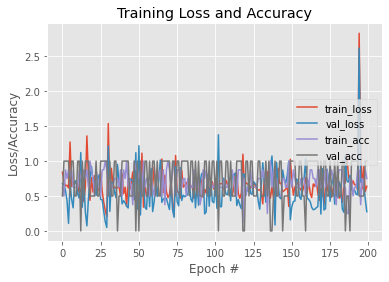

In [37]:
N = 200
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")